<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Đồ án thực hành Cuối kỳ - Nhập môn Khoa học Dữ liệu  
</div>

### Giảng viên hướng dẫn:
- Thầy Lê Nhựt Nam
- Cô Nguyễn Thị Thu Hằng
- Thầy Trần Quốc Huy
### Thông tin nhóm: Nhóm 23
| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Phan Cao Nguyên       | 21120299  |
| Nguyễn Phương    Thảo | 21120366  |

### Chủ đề: Heart Attack Analysis & Prediction


<div style="text-align: left; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 5px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Pha 02 – Xây dựng mô hình dữ liệu và đánh giá 📌
</div>

Thêm các thư viện cần thiết

In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sns.set(style="whitegrid")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# I. Nhập dữ liệu 

In [10]:
smoothed_df = pd.read_csv('Data/smoothed_rate_df.csv')
smoothed_df.sample(10)

locationid  year locationabbr  locationdesc         age_group  \
333569       38011  2009           ND        Bowman    Ages 65+ years   
211791       26041  2011           MI         Delta  Ages 35-64 years   
254435       29045  2015           MO         Clark    Ages 65+ years   
51543         8097  2003           CO        Pitkin  Ages 35-64 years   
423737       48041  2017           TX        Brazos  Ages 35-64 years   
262350       29143  2010           MO    New Madrid  Ages 35-64 years   
154903       20013  2003           KS         Brown    Ages 65+ years   
305780       36055  2000           NY        Monroe  Ages 35-64 years   
31354         6013  2014           CA  Contra Costa  Ages 35-64 years   
109899       17043  2019           IL        DuPage    Ages 65+ years   

       race/ethnicityage_group      sex      x_long      y_lat  data_value  \
333569                   White  Overall -103.520581  46.112666       244.0   
211791                 Overall     Male  -86.923354  45.917450        15.4   
254435                 Overall   Female  -91.738240  40.410277       240.9   
51543                  Overall  Overall -106.915935  39.217321        12.2   
423737                 Overall   Female  -96.302074  30.660976        29.9   
262350                   White  Overall  -89.651787  36.594519        28.3   
154903                 Overall  Overall  -95.564223  39.826509       197.5   
305780                Hispanic  Overall  -77.696000  43.146513        18.3   
31354                  Overall   Female -121.927614  37.919328        18.3   
109899                 Overall  Overall  -88.085605  41.851960       254.7   

        confidence_limit_low  confidence_limit_high  
333569                 199.4                  305.2  
211791                  12.0                   20.3  
254435                 192.2                  337.1  
51543                    8.6                   16.9  
423737                  23.9                   39.2  
262350                  19.4                   36.7  
154903                 165.0                  287.0  
305780                  13.9                   23.7  
31354                   16.3                   21.0  
109899                 232.8                  280.4

In [11]:
smoothed_df.isnull().sum()

locationid                 0
year                       0
locationabbr               0
locationdesc               0
age_group                  0
race/ethnicityage_group    0
sex                        0
x_long                     0
y_lat                      0
data_value                 0
confidence_limit_low       0
confidence_limit_high      0
dtype: int64

# II. Xác định bài toán quan tâm trên tập dữ liệu
**Bài toán:** Dự đoán tỷ lệ tử vong (số ca trên 100.000 dân) trong những năm tiếp theo.

**Ý Nghĩa:**

- Về các vấn đề sức khoẻ nói chung và bệnh tim mạch nói riêng: Tỷ lệ tử vong vì bệnh trong một năm là thước đo tình hình sức khoẻ trong cộng đồng vào năm đó. Thể hiện xu hướng và mức độ nghiêm trọng của bệnh lý này (ở đây cụ thể là bệnh tim mạch liên quan đến tăng huyết áp cục bộ)  
      => Cho biết tình hình có thể được cải thiện hay diễn biến xấu đi, từ đó đưa ra giải pháp phù hợp.


# III. Thao tác với đặc trưng

## Lựa chọn đặc trưng

Những đặc trưng quan trọng cho bài toán mà chúng ta có thể chọn từ tập dữ liệu là `sex` và `race/ethnicityage_group`.  

Ta không chọn các đặc trưng còn lại do hầu hết là các thông tin cố định về địa lý (Tên, Mã ban, Mã quận, kinh độ, vĩ độ). Chủ yếu đóng góp cho việc quan sát phân bố của dữ liệu trên các khu vực địa lý.

Để hỗ trợ cho việc phân tích và xây dựng mô hình, chuẩn hóa các giá trị string của 2 nhóm **sex** và **race/ethnicityage_group** thành int theo chuẩn dưới đây:
- **Sex:**
  - Overall: 0
  - Male: 1
  - Female: 2
- **Race/Ethnicityage:**
  - Overall: 0
  - White: 1
  - Black: 2
  - Hispanic: 3
  - Asian and Pacific Islander: 4 
  - American Indian and Alaskan Native: 5

In [12]:
race_group = {'Overall': 0, 'White': 1, 'Black': 2, 'Hispanic': 3, 'Asian and Pacific Islander': 4, 'American Indian and Alaskan Native': 5}
sex_group = {'Overall': 0, 'Male': 1, 'Female': 2}
age_group = {'Ages 35-64 years': 1, 'Ages 65+ years' :2}

In [13]:
smoothed_df['sex'] = smoothed_df['sex'].map(sex_group)
smoothed_df['race/ethnicityage_group'] = smoothed_df['race/ethnicityage_group'].map(race_group)
smoothed_df['age_group'] = smoothed_df['age_group'].map(age_group)
smoothed_df.drop(['confidence_limit_low', 'confidence_limit_high','x_long','y_lat'], axis=1, inplace=True)


In [14]:
smoothed_df

locationid  year locationabbr locationdesc  age_group  \
0             1001  2000           AL      Autauga          1   
1             1001  2001           AL      Autauga          1   
2             1001  2002           AL      Autauga          1   
3             1001  2003           AL      Autauga          1   
4             1001  2004           AL      Autauga          1   
...            ...   ...          ...          ...        ...   
472677       51053  2017           VA    Dinwiddie          2   
472678       51053  2018           VA    Dinwiddie          2   
472679       51053  2019           VA    Dinwiddie          2   
472680       51053  2000           VA    Dinwiddie          2   
472681       51053  2001           VA    Dinwiddie          2   

        race/ethnicityage_group  sex  data_value  
0                           2.0    0        76.9  
1                           2.0    0        83.4  
2                           2.0    0        86.2  
3                           2.0    0        81.6  
4                           2.0    0        84.7  
...                         ...  ...         ...  
472677                      2.0    0       338.8  
472678                      2.0    0       321.9  
472679                      2.0    0       334.5  
472680                      0.0    2       433.1  
472681                      0.0    2       453.0  

[472682 rows x 8 columns]

In [15]:
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472682 entries, 0 to 472681
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   locationid               472682 non-null  int64  
 1   year                     472682 non-null  int64  
 2   locationabbr             472682 non-null  object 
 3   locationdesc             472682 non-null  object 
 4   age_group                472682 non-null  int64  
 5   race/ethnicityage_group  466422 non-null  float64
 6   sex                      472682 non-null  int64  
 7   data_value               472682 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 28.9+ MB


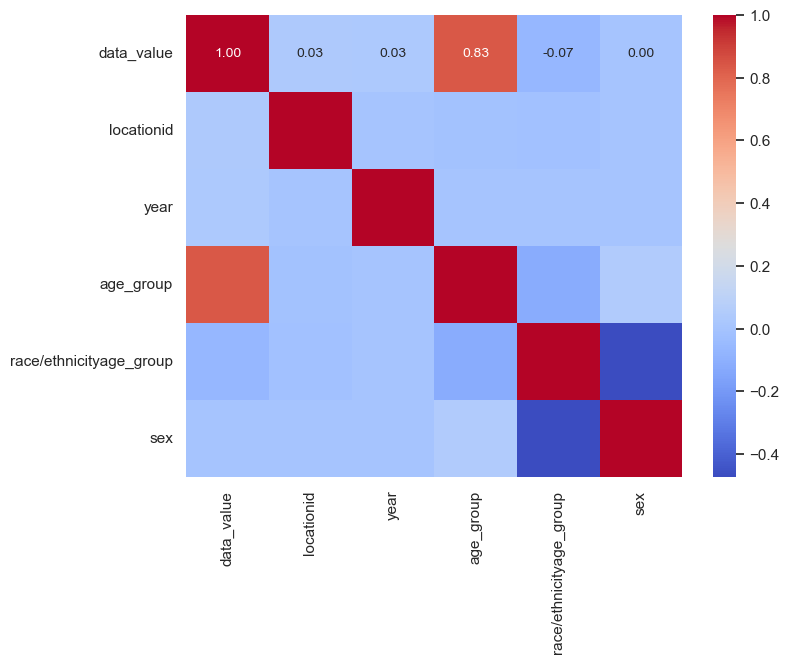

In [16]:
# YOUR CODE HERE
# create a copy
df_copy = smoothed_df.copy()
df_copy = df_copy[['data_value','locationid', 'year', 'age_group', 'race/ethnicityage_group', 'sex' ]]
correlation_matrix = df_copy.corr()
#correlation_matrix

# Vẽ biểu đồ heatmap và thêm chú thích
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 10})

# Hiển thị biểu đồ
plt.show()

In [51]:
# Xử lý data_value
smoothed_df['data_value'] = pd.to_numeric(smoothed_df['data_value'], errors='coerce')  # Chuyển đổi 'data_value' thành số
smoothed_df['data_value_scaled'] = StandardScaler().fit_transform(smoothed_df[['data_value']])
smoothed_df['data_value_log'] = np.log1p(smoothed_df['data_value'])

# Chọn các đặc trưng (features) để làm dự đoán
features = smoothed_df[['locationid','year', 'age_group', 'data_value_scaled', 'data_value_log']]
# Chọn các đặc trưng và biến phụ thuộc
target = smoothed_df['data_value']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Khởi tạo mô hình Polynomial Regression bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (Degree 4): {mse}')

Mean Squared Error (Degree 4): 0.6778821155916253


ValueError: x and y must be the same size

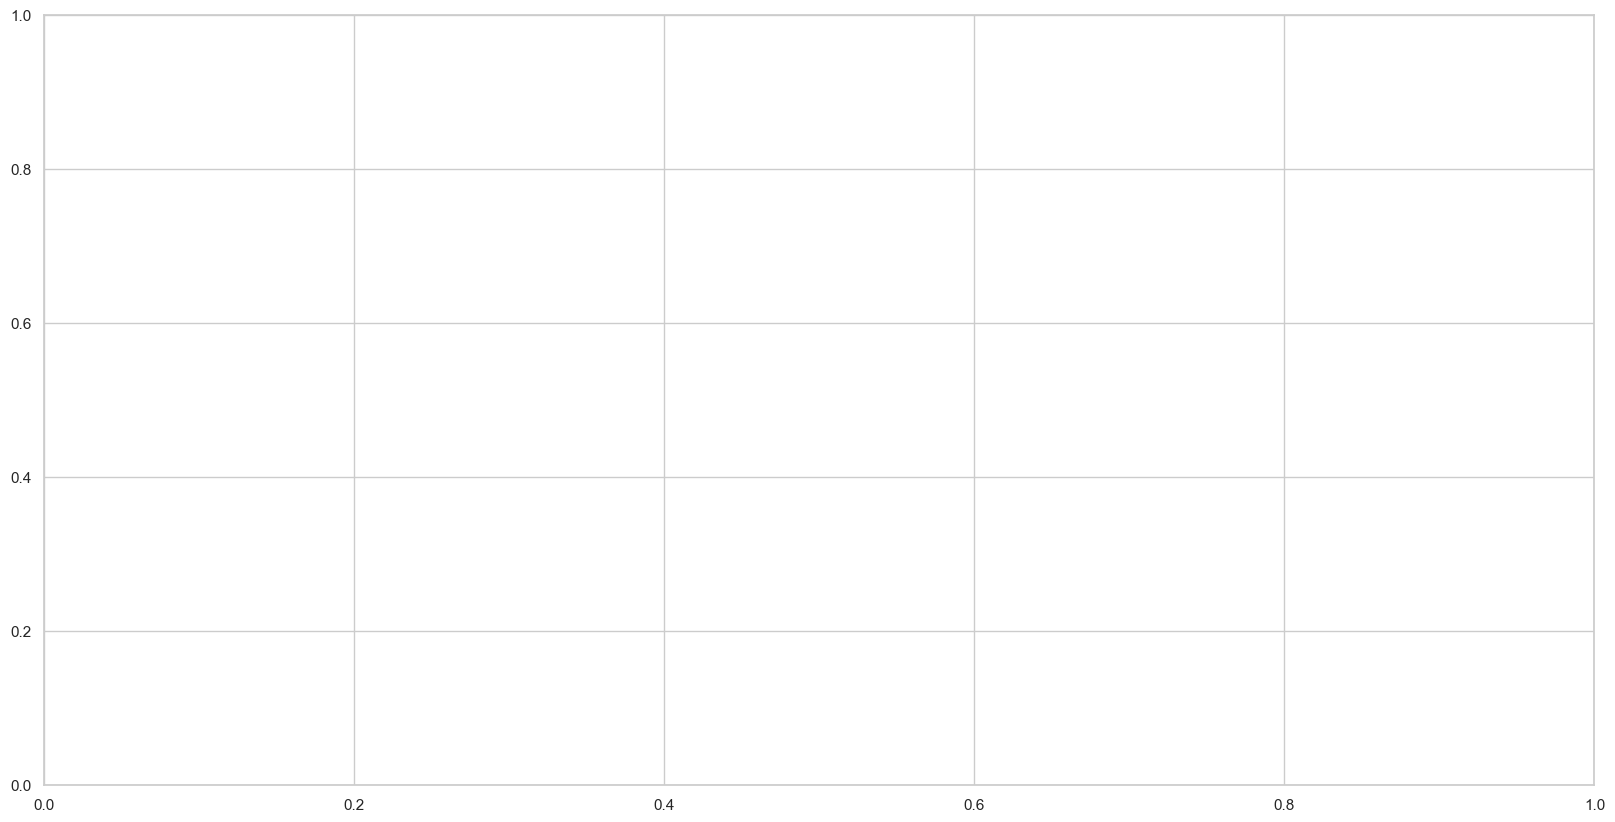

In [65]:
'''# Vẽ biểu đồ scatter plot và đường hồi quy
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, label='Dữ liệu thực tế')
plt.plot(X_train, line_regr.predict(X_train), color='red', label='Đường hồi quy')

plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()
plt.show()'''

In [69]:
print("X_train:")
X_train



X_train:


locationid  year  age_group  data_value_scaled  data_value_log
449086       48355  2006          1          -0.894637        2.939162
100086       15009  2006          1          -0.833962        3.490429
444619       48299  2019          2           1.232889        6.227129
331550       37183  2010          2           0.497378        5.822454
351275       39143  2015          1          -0.887653        3.020425
...            ...   ...        ...                ...             ...
259178       29101  2018          2           0.590790        5.883879
365838       40131  2018          2           3.142599        6.849914
131932       18099  2012          1          -0.867137        3.226844
146867       19109  2007          2           0.333252        5.704449
121958       17189  2018          2           0.576385        5.874650

[378145 rows x 5 columns]

In [60]:
print(y_test.size)

94537


In [62]:
check = {'y_test': y_test,
        'predictions': predictions}

In [63]:
check_df = pd.DataFrame(check)
check_df

y_test  predictions
144162   255.5   256.168448
384827   488.9   488.806201
73605    628.1   628.665500
450547    12.6    13.292725
226533   461.9   461.745130
...        ...          ...
235139   354.0   353.789711
331150    73.6    74.331521
123402    10.7    11.341484
392406   617.9   618.427087
286527   429.1   428.750013

[94537 rows x 2 columns]

In [70]:

# Dữ liệu ban đầu
original_data = smoothed_df['data_value']

# Dữ liệu dự đoán
predicted_data = model.predict(smoothed_df[['locationid', 'year', 'age_group','data_value_scaled', 'data_value_log']])


## Khai thác đặc trưng

In [11]:
median_data_value = smoothed_df['data_value'].median()

In [12]:
smoothed_df['data_value'] = (smoothed_df['data_value'] > median_data_value).astype(int)

In [13]:
# Preparing the data with significant features for logistic regression
X_significant_features = smoothed_df[['sex', 'race/ethnicityage_group']]
y = smoothed_df['data_value']

# Adding a constant to the model (intercept)
X_const_significant_features = sm.add_constant(X_significant_features)

# Building the logistic regression model with significant features
model_significant_features = sm.Logit(y, X_const_significant_features)
result_significant_features = model_significant_features.fit()

# Getting the summary of the logistic regression with significant features
logit_summary_significant_features = result_significant_features.summary2()
logit_summary_significant_features

Optimization terminated successfully.
         Current function value: 0.642315
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    data_value         Pseudo R-squared:   0.073     
Date:                  2023-12-31 21:48   AIC:                42487.4493
No. Observations:      33069              BIC:                42512.6684
Df Model:              2                  Log-Likelihood:     -21241.   
Df Residuals:          33066              LL-Null:            -22922.   
Converged:             1.0000             LLR p-value:        0.0000    
No. Iterations:        5.0000             Scale:              1.0000    
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    1.1069   0.0234  47.3718 0.0000  1.0611  1.1527
sex                     -0.5858   0.0145 -40.3192 0.0000 -0.6143 -0.5574
race/ethnicityage_group -0.3653   0.0085 -43.0724 0.0000 -0.3819 -0.3486
========================================================================

"""

**1. Đặc trưng:**
- sex: -0.5858 - Hệ số cho biến "sex". Nếu là nam, giả sử nguy cơ giảm khoảng 0.56 lần so với nữ.
- race/ethnicityage_group: -0.3653 - Hệ số cho biến "race/ethnicityage_group". Mỗi đơn vị tăng(tăng theo tỉ lệ thành phần sắc tộc), nguy cơ giảm khoảng 0.69 lần.  


**2. Kiểm Định Thống Kê:** Cả ba hệ số đều có giá trị p-value rất thấp (0.0000), chỉ ra rằng chúng có ý nghĩa thống kê.

**3. Độ hội tụ:** Sau 5 lần lặp thì mô hình đã hội tụ, vậy mô hình đã tối ưu, giải pháp ổn định. Khi thêm các đặc trưng, sẽ không làm cho mô hình phức tạp hơn.

In [14]:
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33069 entries, 0 to 33068
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   locationabbr             33069 non-null  object 
 1   locationdesc             33069 non-null  object 
 2   data_value               33069 non-null  int32  
 3   sex                      33069 non-null  int64  
 4   race/ethnicityage_group  33069 non-null  int64  
 5   locationid               33069 non-null  int64  
 6   y_lat                    33069 non-null  float64
 7   x_lon                    33069 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 1.9+ MB


# IV. Dự đoán data_value

In [16]:
smoothed_df = pd.read_csv('Data/smoothed_rate_df.csv')

In [17]:
smoothed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472682 entries, 0 to 472681
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   locationid               472682 non-null  int64  
 1   year                     472682 non-null  int64  
 2   locationabbr             472682 non-null  object 
 3   locationdesc             472682 non-null  object 
 4   age_group                472682 non-null  object 
 5   race/ethnicityage_group  472682 non-null  object 
 6   sex                      472682 non-null  object 
 7   x_long                   472682 non-null  float64
 8   y_lat                    472682 non-null  float64
 9   data_value               472682 non-null  float64
 10  confidence_limit_low     472682 non-null  float64
 11  confidence_limit_high    472682 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 43.3+ MB


**Chọn sample:** Chọn bang có nhiều mẫu nhất để phân tích

In [18]:
location = smoothed_df['locationdesc']
location.groupby(location).count().sort_values(ascending=False).head(10)

locationdesc
Washington    5140
Jefferson     4460
Franklin      3820
Jackson       3820
Montgomery    3440
Madison       3360
Lincoln       3100
Union         3080
Marion        2940
Monroe        2820
Name: locationdesc, dtype: int64

Bang có nhiều dữ liệu nhất là **Washington County**

**Sample:** Dữ liệu được chọn
- Giới tính(sex): Overall
- Sắc tộc(race/ethnicityage_group): Overall
- Tuổi(age_group): Ages 65+ years
- Địa điểm(locationdesc): Washington

In [19]:
fr_df = smoothed_df[(smoothed_df['sex'] == 'Overall') & (smoothed_df['race/ethnicityage_group'] == 'Overall') & (smoothed_df['age_group'] == 'Ages 65+ years') & (smoothed_df['locationdesc'] == 'Washington')]
fr_df

locationid  year locationabbr locationdesc       age_group  \
12540         1129  2000           AL   Washington  Ages 65+ years   
12541         1129  2001           AL   Washington  Ages 65+ years   
12542         1129  2002           AL   Washington  Ages 65+ years   
12543         1129  2003           AL   Washington  Ages 65+ years   
12544         1129  2004           AL   Washington  Ages 65+ years   
...            ...   ...          ...          ...             ...   
467575       50023  2015           VT   Washington  Ages 65+ years   
467576       50023  2016           VT   Washington  Ages 65+ years   
467577       50023  2017           VT   Washington  Ages 65+ years   
467578       50023  2018           VT   Washington  Ages 65+ years   
467579       50023  2019           VT   Washington  Ages 65+ years   

       race/ethnicityage_group      sex     x_long      y_lat  data_value  \
12540                  Overall  Overall -88.208190  31.407577       517.5   
12541                  Overall  Overall -88.208190  31.407577       525.1   
12542                  Overall  Overall -88.208190  31.407577       567.8   
12543                  Overall  Overall -88.208190  31.407577       589.9   
12544                  Overall  Overall -88.208190  31.407577       634.5   
...                        ...      ...        ...        ...         ...   
467575                 Overall  Overall -72.614273  44.273773       504.6   
467576                 Overall  Overall -72.614273  44.273773       499.6   
467577                 Overall  Overall -72.614273  44.273773       544.2   
467578                 Overall  Overall -72.614273  44.273773       563.1   
467579                 Overall  Overall -72.614273  44.273773       567.0   

        confidence_limit_low  confidence_limit_high  
12540                  441.5                  624.5  
12541                  450.5                  623.4  
12542                  475.3                  695.9  
12543                  504.5                  682.8  
12544                  545.1                  769.7  
...                      ...                    ...  
467575                 439.7                  588.5  
467576                 413.7                  575.3  
467577                 473.1                  637.0  
467578                 473.9                  655.7  
467579                 459.9                  658.9  

[580 rows x 12 columns]

## Đánh giá thuật toán

Mean Squared Error (Degree 4): 5.908283740132591e-11


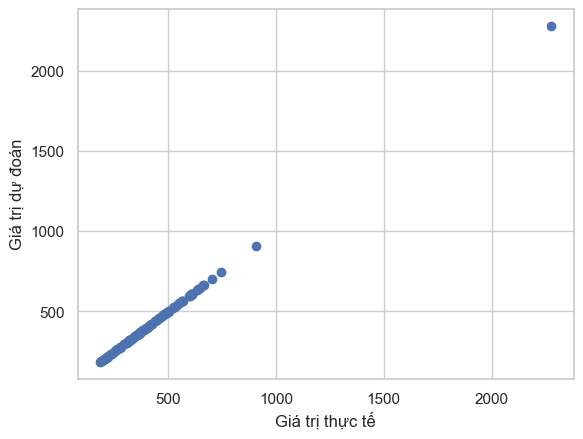

In [20]:
# Xử lý data_value
fr_df['data_value'] = pd.to_numeric(fr_df['data_value'], errors='coerce')  # Chuyển đổi 'data_value' thành số
fr_df['data_value_scaled'] = StandardScaler().fit_transform(fr_df[['data_value']])
fr_df['data_value_log'] = np.log1p(fr_df['data_value'])

# Chọn các đặc trưng (features) để làm dự đoán
features = fr_df[['year', 'data_value_scaled', 'data_value_log']]
target = fr_df['data_value'] # Chọn biến phụ thuộc để dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Khởi tạo mô hình Polynomial Regression bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (Degree 4): {mse}')

plt.scatter(y_test, predictions)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.show()

In [37]:
predictions

array([ 504.59999974,  611.6000004 ,  397.59999942,  558.20000141,
        345.40000014,  263.6999972 ,  257.89999801,  399.89999958,
        324.99999933,  295.69999934,  355.69999747,  222.30000069,
        440.29999973,  232.8999971 ,  346.20000145,  371.30000058,
        279.6999968 ,  908.70001208,  437.79999947,  319.00000028,
        209.40000308,  400.00000036,  567.80000063,  192.80000115,
        421.79999986,  662.89999632,  295.70000177,  529.10000049,
        637.60000582,  491.69999952,  547.5000017 ,  370.60000059,
        486.99999921,  189.99999703,  491.89999848,  746.79999666,
        253.69999985,  204.3000043 ,  405.39999937,  213.79999648,
        447.79999941,  361.20000082,  207.30000125,  602.99999987,
        212.59999529,  528.20000025,  605.00000387,  446.80000181,
        242.90000321,  355.50000038,  347.0999992 ,  307.19999858,
        328.10000121,  321.49999648,  647.30000245,  475.19999973,
        340.20000015,  596.50000337,  504.69999959,  424.10000

Với Mean Squared Error (MSE) rất thấp, được xem là một kết quả tốt, chỉ ra rằng mô hình của có khả năng dự đoán rất gần với giá trị thực tế. Vậy mô hình đa thức bậc 4 có thể sử dụng để dự đoán data_value.

## Dự đoán data_value cho năm 2020

Dự đoán giá trị cho năm 2020: 586.3443292081356


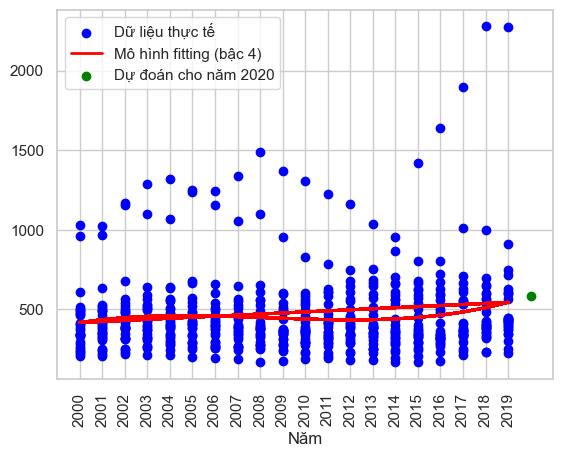

In [41]:
# Chuẩn bị dữ liệu cho fitting
X = fr_df[['year']]
y = fr_df['data_value']

# Chọn mô hình đa thức bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Thực hiện fitting
model.fit(X, y)

# Dự đoán giá trị cho năm 2020
X_2020 = [[2020]]
predicted_value_2020 = model.predict(X_2020)
print("Dự đoán giá trị cho năm 2020:", predicted_value_2020[0])

# Vẽ đồ thị
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'Mô hình fitting (bậc {degree})')
plt.scatter(2020, predicted_value_2020, color='green', marker='o', label='Dự đoán cho năm 2020')
plt.xticks(fr_df['year'].unique(), rotation=90)
plt.xlabel('Năm')
plt.legend()
plt.show()

In [39]:
predicted_value_2020

array([586.34432921])

In [22]:
# Data_value trung bình năm 2019
fr_df['data_value'][fr_df['year'] == 2019].mean()

529.7655172413793

**Comment:** 
- data_value dự đoán của năm 2020 lớn hơn với data_value trung bình của năm 2019 (586 > 529).
- Xu hướng gia tăng của data_value qua các năm.

Dựa trên các thông tin trên, giá trị dự đoán data_value của năm 2020 có thể xem xét sử dụng.

Dự đoán giá trị cho năm 2022: 698.3339050710201


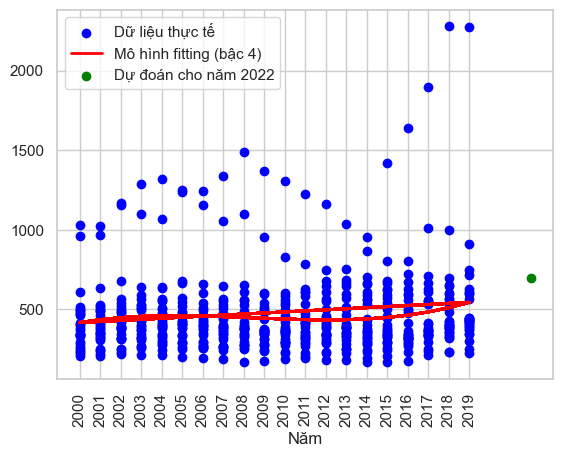

In [23]:
# Chuẩn bị dữ liệu cho fitting
X = fr_df[['year']]
y = fr_df['data_value']

# Chọn mô hình đa thức bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Thực hiện fitting
model.fit(X, y)

# Dự đoán giá trị cho năm 2020
X_2022 = [[2022]]
predicted_value_2022 = model.predict(X_2022)
print("Dự đoán giá trị cho năm 2022:", predicted_value_2022[0])

# Vẽ đồ thị
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'Mô hình fitting (bậc {degree})')
plt.scatter(2022, predicted_value_2022, color='green', marker='o', label='Dự đoán cho năm 2022')
plt.xticks(fr_df['year'].unique(), rotation=90)
plt.xlabel('Năm')
plt.legend()
plt.show()

# III. Phân loại
So sánh lựa chọn mô hình thích hợp cho việc phân loại data_value dựa trên sex và race/ethnicityage

## Chia dữ liệu

In [24]:
X = smoothed_df[['race/ethnicityage_group', 'sex']]
y = smoothed_df['data_value']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
y

0        0
1        0
2        0
3        1
4        0
        ..
33064    0
33065    0
33066    0
33067    1
33068    1
Name: data_value, Length: 33069, dtype: int32

## Decision Tree Classifier

In [26]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_prediction = DT.predict(X_test)
tree_train_acc = round(accuracy_score(y_train,DT.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , tree_test_acc,' %')`

Accuracy =  79.0  %


In [35]:
y_prediction

array([0, 0, 1, ..., 1, 0, 0])

In [28]:
print(classification_report(

    y_test,
    DT.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3268
           1       0.76      0.86      0.81      3346

    accuracy                           0.79      6614
   macro avg       0.80      0.79      0.79      6614
weighted avg       0.80      0.79      0.79      6614



## Random Forest Classifier

In [29]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_prediction = RF.predict(X_test)
rdm_train_acc = round(accuracy_score(y_train,RF.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')

Accuracy =  79.0  %


In [31]:
print(classification_report(

    y_test,
    RF.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3268
           1       0.76      0.86      0.81      3346

    accuracy                           0.79      6614
   macro avg       0.80      0.79      0.79      6614
weighted avg       0.80      0.79      0.79      6614



## Logistic Regression Classifier

In [32]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_prediction = LR.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,LR.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ',lr_test_acc ,' %')

Accuracy =  68.43  %


In [34]:
print(classification_report(

    y_test,
    LR.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3268
           1       0.69      0.69      0.69      3346

    accuracy                           0.68      6614
   macro avg       0.68      0.68      0.68      6614
weighted avg       0.68      0.68      0.68      6614



## Kết luận:
2 mô hình **Decision Tree Classifier** và **Random Forest Classifier** thích hợp cho việc phân loại bộ dữ liệu với với accuracy = 79%